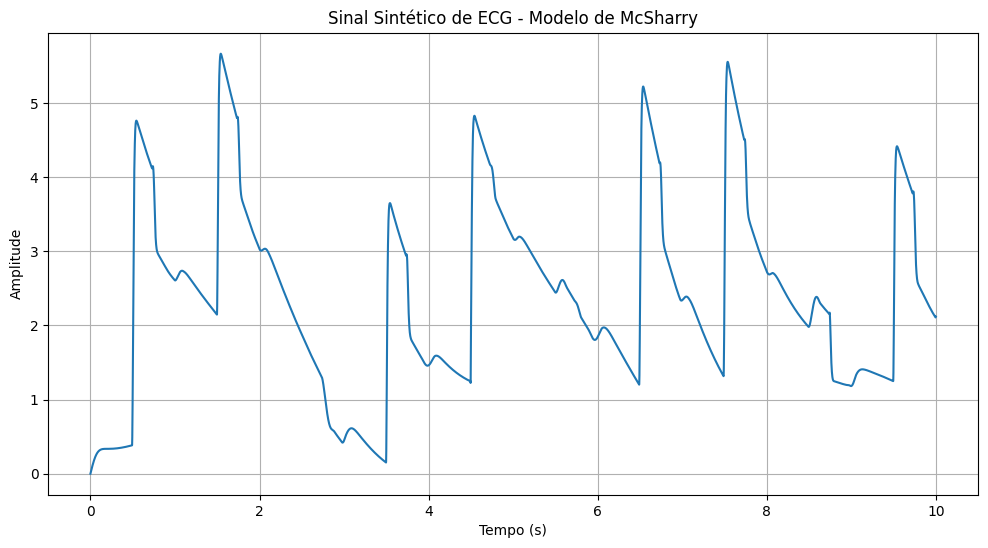

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir os parâmetros do modelo de McSharry
A = [1.2, -5.0, 30.0, -7.5, 0.75]
theta_i = [-np.pi/3, -np.pi/12, np.pi, 3 * np.pi / 2, 2 * np.pi]
b_i = [0.25, 0.1, 0.1, 0.1, 0.4]
f_2 = 0.25
T = 1.0  # Período constante

# Definir a função que representa as EDOs
def mcsharry(t, state):
    x, y, z = state
    omega = 2 * np.pi / T
    alpha = 1 - np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    z0 = np.sin(2 * np.pi * f_2 * t)
    
    dxdt = alpha * x - omega * y
    dydt = alpha * y + omega * x
    dzdt = -sum(A[j] * (theta - theta_i[j]) * np.exp(-((theta - theta_i[j]) % (2 * np.pi))**2 / (2 * b_i[j]**2)) for j in range(len(A))) - (z - z0)
    
    return [dxdt, dydt, dzdt]

# Condições iniciais
initial_state = [1.0, 0.0, 0.0]

# Intervalo de tempo para simulação
t_span = (0, 10)
t_eval = np.linspace(*t_span, 10000)

# Resolver as EDOs usando solve_ivp com método RK45
sol = solve_ivp(mcsharry, t_span, initial_state, t_eval=t_eval, method='RK45')

# Obtendo o sinal de ECG (considerando a componente 'z')
ecg_signal = sol.y[2]

# Plotar o sinal de ECG sintético
plt.figure(figsize=(12, 6))
plt.plot(sol.t, ecg_signal)
plt.title('Sinal Sintético de ECG - Modelo de McSharry')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


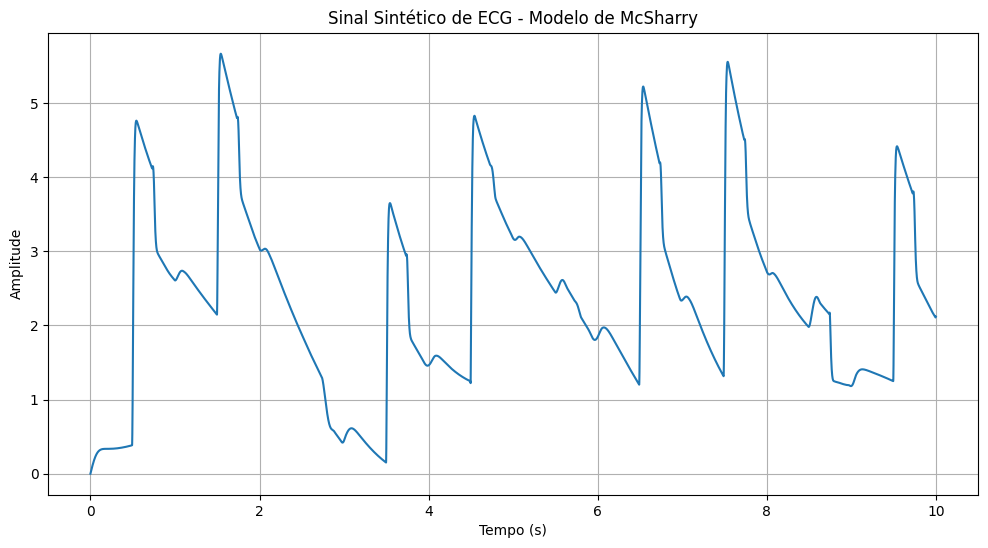

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir os parâmetros do modelo de McSharry
A = [1.2, -5.0, 30.0, -7.5, 0.75]
theta_i = [-np.pi/3, -np.pi/12, np.pi, 3 * np.pi / 2, 2 * np.pi]
b_i = [0.25, 0.1, 0.1, 0.1, 0.4]
f_2 = 0.25
T = 1.0  # Período constante

# Definir a função que representa as EDOs
def mcsharry(t, state):
    x, y, z = state
    omega = 2 * np.pi / T
    alpha = 1 - np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    z0 = np.sin(2 * np.pi * f_2 * t)
    
    # Corrigir o cálculo de dzdt
    dzdt = -sum(A[j] * (theta - theta_i[j]) * np.exp(-((theta - theta_i[j]) % (2 * np.pi))**2 / (2 * b_i[j]**2)) for j in range(len(A))) - (z - z0)
    
    dxdt = alpha * x - omega * y
    dydt = alpha * y + omega * x
    
    return [dxdt, dydt, dzdt]

# Condições iniciais
initial_state = [1.0, 0.0, 0.0]

# Intervalo de tempo para simulação
t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000000)

# Resolver as EDOs usando solve_ivp com método RK45
sol = solve_ivp(mcsharry, t_span, initial_state, t_eval=t_eval, method='RK45')

# Obtendo o sinal de ECG (considerando a componente 'z')
ecg_signal = sol.y[2]

# Plotar o sinal de ECG sintético
plt.figure(figsize=(12, 6))
plt.plot(sol.t, ecg_signal)
plt.title('Sinal Sintético de ECG - Modelo de McSharry')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir os parâmetros do modelo de McSharry
A = [1.2, -5.0, 30.0, -7.5, 0.75]
theta_i = [-np.pi/3, -np.pi/12, np.pi, 3 * np.pi / 2, 2 * np.pi]
b_i = [0.25, 0.1, 0.1, 0.1, 0.4]
f_2 = 0.25
T = 1.0  # Período constante

# Definir a função que representa as EDOs
def mcsharry(t, state):
    x, y, z = state
    omega = 2 * np.pi / T
    alpha = 1 - np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    z0 = np.sin(2 * np.pi * f_2 * t)
    
    # Corrigir o cálculo de dzdt
    dzdt = -sum(A[j] * (theta - theta_i[j]) * np.exp(-((theta - theta_i[j]) % (2 * np.pi))**2 / (2 * b_i[j]**2)) for j in range(len(A))) - (z - z0)
    
    dxdt = alpha * x - omega * y
    dydt = alpha * y + omega * x
    
    return [dxdt, dydt, dzdt]

# Condições iniciais
initial_state = [1.0, 0.0, 0.0]

# Intervalo de tempo para simulação
t_span = (0, 10)
t_eval = np.linspace(*t_span, 10000000)

# Resolver as EDOs usando solve_ivp com método DOP853
sol = solve_ivp(mcsharry, t_span, initial_state, t_eval=t_eval, method='DOP853')

# Obtendo o sinal de ECG (considerando a componente 'z')
ecg_signal = sol.y[2]

# Plotar o sinal de ECG sintético
plt.figure(figsize=(12, 6))
plt.plot(sol.t, ecg_signal)
plt.title('Sinal Sintético de ECG - Modelo de McSharry')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


KeyboardInterrupt: 